# Simulating a Basic Solow Model and Dasgupta's Bounded Growth Model

### System setup:

In [1]:
#Import relevant libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve
import os
#
#Please update this to the file where you would like the resulting plots to be saved:
file_location = 'C:/Users/Zachary/Desktop/Bounded_Growth_Model_for_ERE_2021/'
#Creates the file at the location specified if it does not exist:
if not os.path.exists(file_location):
    os.makedirs(file_location)
#Changes to the file to use as the working directory:
os.chdir(file_location)
print(os.getcwd())

C:\Users\Zachary\Desktop\Bounded_Growth_Model_for_ERE_2021


### Set some initial parameters:
#### These are used for both the standard Solow growth model and the Dasgupta bounded growth model.

In [2]:
#Set up as a library of parameter symbols/names and their initial values:
#(unless later specified differently, also not all are necessarily used)
i_params = {'n' : 0.01,              
                  's' : 0.10,         #savings rate  
                  'δ' : 0.06,         #depreciation rate              
                  'g' : 0.01,              
                  'S' : 10,           #biosphere stock
                  'r' : 0.01,
                  'S_cap' : 10,       #biosphere 
                  'α_x' : 1,
                  'α_z' : 5,            
                  'I_K' : 1/3,        #investment share in capital
                  'I_H' : 1/3,        #investment share in human capital
                  'I_A' : 1/3,        #investment share in TFP
                  'A' : 1.0,          #classical TFP
                  'N' : 0.1,          #population
                  'H' : 1.0,          #human capital 
                  'S_factor' : 1/3,   #coef on S
                  'a_factor' : 1/3,   #coef on physical capital
                  'b_factor' : 1/3,   #coef on human capital
                  'R' : 1,            #biosphere provisioning services
                  'Y' : 0.001,        #initial output
                  'L_floor' : 0.5,    #safety zone floor
                  'α_z_scalar' : 1}   #safety zone parameter

### Define the Classic Solow Growth Model as a Class:
#### We will then call instances of it in the next step to generate the results of interest.

In [3]:
#Define the classic Solow growth model as a set of functions within the Solow growth model as a class:
class Solow_model:
    #Set the initial parameters for the model:
    def __init__(self, i_params):
        #Either import the inital parameters or generate the ones needed based on them:
        self.n = i_params['n']
        self.s = i_params['s']
        self.δ = i_params['δ']
        self.g = i_params['g']
        self.Y = i_params['Y']
        self.K = self.s * self.Y
        self.N = i_params['N']
        self.cap_worker=self.K/self.N
        self.y = self.Y/self.N
        self.L_floor = i_params['L_floor']
        self.S = i_params['S']
        self.r = i_params['r']
        self.α_z = i_params['α_z']
        self.S_factor = i_params['S_factor']
        self.a_factor = i_params['a_factor']
        self.b_factor = i_params['b_factor']
        self.A = i_params['A']
        self.sy= self.s*self.y
        self.A = i_params['A'] 
        self.I = (self.s*self.Y)    
        self.C = (self.Y-self.I)
        self.I_K, self.I_H, self.I_A = i_params['I_K'], i_params['I_H'], i_params['I_A']
        self.Y = (self.K**self.a_factor) * ((self.N*self.A)**(1-self.a_factor)) 
        #Finally, initialize the model parameters as a copy of the initial params:
        self.initdata = vars(self).copy()
    #
    #Then, write the Solow update rules as a set of functions to call later:    
    def calc_K(self):
        "Update capital, K"
        s, Y, δ, K = self.s, self.Y, self.δ, self.K
        return ( K+(s*Y)-(δ*K) )
    def calc_A(self):
        "Update TFP, A, which in this base case remains constant"
        A, I_A, I = self.A, self.I_A, self.I
        return (A)
    def calc_N(self):
        "Update population, at growth rate n"
        N, n = self.N, self.n    
        return ( N*np.exp(n) )
    def calc_cap_worker(self):
        "Update capital per worker"
        K, N = self.K, self.N
        return (K/N)
    def calc_Y(self):
        "Update total output"
        K, N, A, a_factor = self.K, self.N, self.A, self.a_factor      
        return ( (K**a_factor) * ((N*A)**(1-a_factor)) )
    #
    #Then, this function ensures the values in each iteration are updated in the correct order.
    #(some are not updated at this stage, for example A, but available to expand the model)
    def update(self):
        "Update the current states of each value of interest"
        self.Y = self.calc_Y()
        self.y = self.Y/self.N        
        self.K = self.calc_K()
        self.A = self.calc_A()
        self.N = self.calc_N()
        self.E = self.A 
        self.sy = self.s*self.y
        self.cap_worker = self.calc_cap_worker()
    #    
    #Finally, this function generates the sequence of results for T total periods for whichever variable is called.
    def result_gen(self, t, var, init = True):
        "Generate and return a time series of selected variables"
        path = []
        #initialize the data:
        if init == True:
            for para in self.initdata:
                 setattr(self, para, self.initdata[para])
        #Then use the update function for the values in each t:
        for i in range(t):
            path.append(vars(self)[var])
            self.update()
        #Returns the output 'path' of resulting values:
        return path

### Set up and Run the Solow model by calling instances:

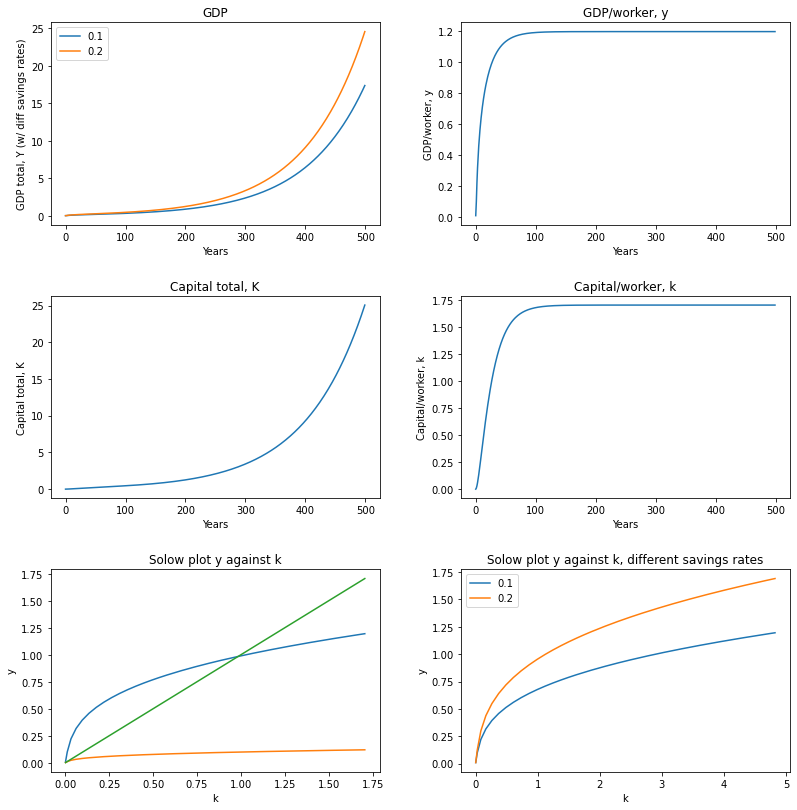

In [4]:
#500 'years':
T = 500               
#Run one example with a 10% savings rate
i_params['s']=0.10
s1=i_params['s']
base_model = Solow_model(i_params)
#Then compare with a 20% rate
i_params['s']=0.20
base_model_2 = Solow_model(i_params)
s2=i_params['s']
#
#Set up the subplot space as three panels long and two panels wide:
fig, axes = plt.subplots(3, 2, figsize=(11, 11))
fig.tight_layout(h_pad=5, w_pad=5)
#Plot GDP, Y:
plt.subplot(3,2,1)
plt.plot(range(0,T),base_model.result_gen(T, var = 'Y'), label=s1)
plt.plot(range(0,T),base_model_2.result_gen(T, var = 'Y'), label=s2)
plt.title('GDP')
plt.ylabel('GDP total, Y (w/ diff savings rates)')
plt.xlabel('Years')
plt.legend(loc='upper left') 
#Plot GDP/worker:
plt.subplot(3,2,2)
plt.plot(range(0,T),base_model.result_gen(T, var = 'y'))
plt.title('GDP/worker, y')
plt.ylabel('GDP/worker, y')
plt.xlabel('Years')
#Plot Capital, K:
plt.subplot(3,2,3)
plt.plot(range(0,T),base_model.result_gen(T, var = 'K'))
plt.title('Capital total, K')
plt.ylabel('Capital total, K')
plt.xlabel('Years')
#Plot Capital/worker:
plt.subplot(3,2,4)
plt.plot(range(0,T),base_model.result_gen(T, var = 'cap_worker'))
plt.title('Capital/worker, k')
plt.ylabel('Capital/worker, k')
plt.xlabel('Years')
#Plot Solow plot:
plt.subplot(3,2,5)
plt.plot(base_model.result_gen(T, var = 'cap_worker'), base_model.result_gen(T, var = 'y'))
plt.plot(base_model.result_gen(T, var = 'cap_worker'), base_model.result_gen(T, var = 'sy'))
plt.plot(base_model.result_gen(T, var = 'cap_worker'), base_model.result_gen(T, var = 'cap_worker'))
plt.title('Solow plot y against k')
plt.ylabel('y')
plt.xlabel('k')
#Plot Solow plot with diff savings rates:
plt.subplot(3,2,6)
plt.plot(base_model_2.result_gen(T, var = 'cap_worker'), base_model.result_gen(T, var = 'y'), label=s1)
plt.plot(base_model_2.result_gen(T, var = 'cap_worker'), base_model_2.result_gen(T, var = 'y'), label=s2)
plt.legend(loc='upper left') 
plt.title('Solow plot y against k, different savings rates')
plt.ylabel('y')
plt.xlabel('k')
#Show the resulting six-panel plot:
plt.show()

### Define the Dasgupta Bounded Growth Model as a Class:
#### We will again call instances of this model to get our results of interest.

In [5]:
#Define the baseline bounded global economy model as a function to call:
class BGE_model:
    """ 
    Note this implements the Bounded Global Economy model from 
    The Economics of Biodiversity: The Dasgupta Review Chapter 4* (p.137-143)
    """
    def __init__(self, i_params):
        #import the inital params and generate the ones needed (same setup as in the Solow model):
        self.n = i_params['n']
        self.s = i_params['s']
        self.δ = i_params['δ']
        self.g = i_params['g']
        self.Y = i_params['Y']
        self.K = self.s * self.Y
        self.N = i_params['N']
        self.Ng = 0.01
        self.cap_worker=self.K/self.N
        self.y = self.Y/self.N
        self.L_floor = i_params['L_floor']
        self.S = i_params['S']
        self.r = i_params['r']
        self.S_cap = i_params['S_cap']
        self.α_x = i_params['α_x']
        self.α_z = i_params['α_z']
        self.H = i_params['H']
        self.S_factor = i_params['S_factor']
        self.a_factor = i_params['a_factor']
        self.b_factor = i_params['b_factor']
        self.A = i_params['A']
        self.sy= self.s*self.y
        self.R = (self.Y /  (self.A * (self.S**self.S_factor) * (self.K**self.a_factor) * (self.H**self.b_factor)))**(1/(1-self.a_factor-self.b_factor)) 
        self.I = (self.s*self.Y)    
        self.C = (self.Y-self.I)
        self.G_S = self.S
        self.I_K, self.I_H, self.I_A = i_params['I_K'], i_params['I_H'], i_params['I_A']
        self.Y = self.A * (self.S**self.S_factor) * (self.K**self.a_factor) * (self.H**self.b_factor) * (self.R**(1-self.a_factor-self.b_factor))
        self.environmental_impact = 0 #Also consider: self.R+(self.Y/self.α_z)
        self.counter=0
        self.alternative=0
        self.α_z_scalar = i_params['α_z_scalar']
        #Again copy the model parameters as the initial params:
        self.initdata = vars(self).copy()

    #Again write the update rules as a set of functions to call:
    def calc_S(self):
        "This is to update S by dS/dt based on Eqn 4*.6 on P.141. This is the biggest departure of the model."
        #Define the initial function params:
        #Note L_floor is the safety zone
        S, r, S_cap, L_floor, Y, α_x, α_z = self.S, self.r, self.S_cap, self.L_floor, self.Y, self.α_x, self.α_z
        α_z_scalar = self.α_z_scalar
        A=self.A
        alternative=self.alternative
        #Note there are several alternatives not used in the paper which are explored here. They are each
        #based on some intervention occurring at t=50 or some parameter change from that moment onward.
        #Apply equation 4*.6 and update S:
        if alternative==0:
            return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
        elif alternative==1: 
            if self.counter == 50:
                return ( 2 + S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
            else:
                return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
        elif alternative==2: 
            if self.counter >= 50:
                return ( S+( (r*S*(1-(S/(S_cap+2)))*((S-L_floor)/(S_cap+2))) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
            else:
                return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
        elif alternative==3: 
            if self.counter >= 50:
                return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - 0.8*(Y/α_x) - 0.8*(Y/(α_z_scalar*α_z)) ) )
            else:
                return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
        elif alternative==4: 
            if self.counter >= 50:
                return ( 1.01*S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
            else:
                return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
        elif alternative==5: 
            if self.counter == 50:
                return ( 2+ 1.01*S+( (r*S*(1-(S/(S_cap+2)))*((S-L_floor)/(S_cap+2))) - 0.8*(Y/α_x) - 0.8*(Y/(α_z_scalar*α_z)) ) )
            elif self.counter > 50:
                return ( 1.01*S+( (r*S*(1-(S/(S_cap+2)))*((S-L_floor)/(S_cap+2))) - 0.8*(Y/α_x) - 0.8*(Y/(α_z_scalar*α_z)) ) )
            else:
                return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
        elif alternative==6: 
            if self.counter == 50:
                return ( S+( ((1.1*r)*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
            else:
                return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )
        #This is the baseline update rule for S:
        else:
            return ( S+( (r*S*(1-(S/S_cap))*((S-L_floor)/S_cap)) - (Y/α_x) - (Y/(α_z_scalar*α_z)) ) )

    def calc_K(self):
        "Update K by dK/dt based on Eqn 4*.9"
        #Define the initial function params:
        Y, C, I, I_H, I_A, δ, K = self.Y, self.C, self.I, self.I_H, self.I_A, self.δ, self.K   
        #return ( K+( Y-C-(I_H*I)-(I_A*I)-(δ*K) ) )
        I_K = self.I_K
        s = self.s
        return ( K+ (I_K*s*Y) - (δ*K) )
    
    def calc_A(self):
        "Update TFP, A based on reinvestment share"
        A, I_A, I = self.A, self.I_A, self.I
        #return (A)     #In the prior Solow Growth model A is constant
        #print(I)
        return ( A + (I_A*I) )
    def calc_N(self):
        "This updates N which can be based on equation 4*.7 or alternative assumptions"
        N, H, n = self.N, self.H, self.n
        #h = H/N
        #J=1/(1+np.exp(-0.1*(h-50)))        
        #return ( N+(N*(J-N)) )
        #return(N)
        return( (1+n)*N )    #for Solow
    def calc_R(self):
        Y, α_x = self.Y, self.α_x
        return ( Y/α_x )  
    def calc_α_x(self):
        """As discussed with the S update function, interventions at t=50 are considered but not discussed in the paper.
           Some involve updating how α_x is calculated."""
        Y, A, S, S_factor, K, a_factor, H, b_factor = self.Y, self.A, self.S, self.S_factor, self.K, self.a_factor, self.H, self.b_factor 
        α_x_0 = self.α_x
        alternative=self.alternative
        if alternative==1 or alternative==2 or alternative==3 or alternative==4 or alternative==6:
            if self.counter >= 50:
                func = lambda α_x : ((0.99 * Y / (A*(S**S_factor)*(K**a_factor)*(H**b_factor)))**(1/(1-a_factor-b_factor)))-(Y/α_x)
                α_x_initial_guess = α_x_0
                α_x_solution = fsolve(func, α_x_initial_guess)
                return ( α_x_solution[0] )
            else:
                func = lambda α_x : ((Y / (A*(S**S_factor)*(K**a_factor)*(H**b_factor)))**(1/(1-a_factor-b_factor)))-(Y/α_x)
                α_x_initial_guess = α_x_0
                α_x_solution = fsolve(func, α_x_initial_guess)
                return ( α_x_solution[0] )
        elif alternative==5 or alternative==100:
            if self.counter >= 50:
                func = lambda α_x : ((0.99 * Y / (A*(S**(S_factor*1.2))*(K**a_factor)*(H**b_factor)))**(1/(1-a_factor-b_factor)))-(Y/α_x)
                α_x_initial_guess = α_x_0
                α_x_solution = fsolve(func, α_x_initial_guess)
                return ( α_x_solution[0] )  
            else:
                func = lambda α_x : ((Y / (A*(S**S_factor)*(K**a_factor)*(H**b_factor)))**(1/(1-a_factor-b_factor)))-(Y/α_x)
                α_x_initial_guess = α_x_0
                α_x_solution = fsolve(func, α_x_initial_guess)
                return ( α_x_solution[0] )
        #This is the baseline update rule for α_x:
        else:
            func = lambda α_x : ((Y / (A*(S**S_factor)*(K**a_factor)*(H**b_factor)))**(1/(1-a_factor-b_factor)))-(Y/α_x)
            α_x_initial_guess = α_x_0
            α_x_solution = fsolve(func, α_x_initial_guess)
            return ( α_x_solution[0] )

    def calc_H(self):
        N, H, I_H, I = self.N, self.H, self.I_H, self.I  
        return ( H + (I_H*I) )
    def calc_sy(self):
        s, y = self.s, self.y  
        return ( s*y )    
    def calc_cap_worker(self):
        K, N = self.K, self.N
        return (K/N)
    def calc_Y(self):
        "Update GDP"
        A, S, S_factor, K, H, R, a_factor, b_factor = self.A, self.S, self.S_factor, self.K, self.H, self.R, self.a_factor, self.b_factor
        alternative=self.alternative
        if alternative==100 or alternative==5:
            if self.counter >= 50:
                return ( A * (S**(S_factor*1.2)) * (K**a_factor) * (H**b_factor) * (R**(1-a_factor-b_factor)) )
            else:
                return ( A * (S**S_factor) * (K**a_factor) * (H**b_factor) * (R**(1-a_factor-b_factor)) )
        elif alternative==1 or alternative==2 or alternative==3 or alternative==4:
            if self.counter >= 50:
                return ( A * (S**S_factor) * (K**a_factor) * (H**b_factor) * (R**(1-a_factor-b_factor)) )
            else:
                return ( A * (S**S_factor) * (K**a_factor) * (H**b_factor) * (R**(1-a_factor-b_factor)) )  
        #This is the baseline update rule for Y:
        else:
            return ( A * (S**S_factor) * (K**a_factor) * (H**b_factor) * (R**(1-a_factor-b_factor)) )    
    def calc_α_z(self):
        S, r, S_cap, L_floor, Y, α_x, α_z = self.S, self.r, self.S_cap, self.L_floor, self.Y, self.α_x, self.α_z
        I=self.I
        A=self.A
        s=self.s
        Y=self.Y
        return ( 10/(1+np.exp(-10*(A-1))) )
    def calc_environmental_impact(self):
        R, Y, α_z = self.R, self.Y, self.α_x
        return ( R+(Y/α_z) )
    
    #This function is again called to update the values in each iteration in the right order:    
    def update(self):
        "Update the current state."
        self.A = self.calc_A()
        self.K = self.calc_K()
        self.N = self.calc_N()
        self.H = self.calc_H()
        self.sy = self.calc_sy()
        self.cap_worker = self.calc_cap_worker()
        self.R = self.calc_R()
        self.S = self.calc_S()
        self.Y = self.calc_Y()
        self.y = self.Y/self.N  
        self.I = (self.s*self.Y)
        self.α_z = self.calc_α_z()
        self.α_x = self.calc_α_x()
        self.environmental_impact = self.calc_environmental_impact()
            
    #Finally, this function again generates the sequence of results up to T periods for whichever variable is called:          
    def result_gen(self, t, var, init = True, alternative=0):
        "Generate and return a time series of selected variables"
        path = []
        #initialize the data: 
        if init == True:
            for para in self.initdata:
                 setattr(self, para, self.initdata[para])
        #update the function for the values in each t:
        for i in range(t):
            self.alternative=alternative
            self.counter=self.counter+1
            #print(self.counter)
            path.append(vars(self)[var])
            self.update()
        #Returns our resulting pathway:
        return path

### Call instances of the Dasgupta Bounded Global Economy Model:
#### Note all the plots used in the paper are generated from the following box.

<ipython-input-5-e5855dc79031>:180: RuntimeWarning: invalid value encountered in double_scalars
  return ( A * (S**S_factor) * (K**a_factor) * (H**b_factor) * (R**(1-a_factor-b_factor)) )
<ipython-input-5-e5855dc79031>:150: RuntimeWarning: invalid value encountered in double_scalars
  func = lambda α_x : ((Y / (A*(S**S_factor)*(K**a_factor)*(H**b_factor)))**(1/(1-a_factor-b_factor)))-(Y/α_x)
C:\Users\Zachary\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


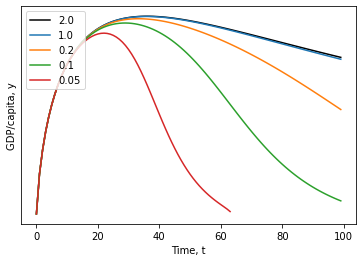

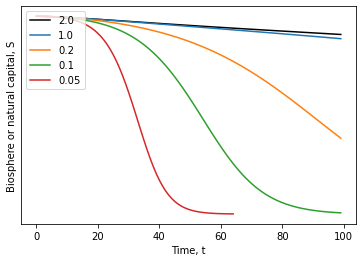

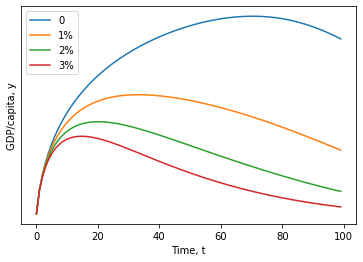

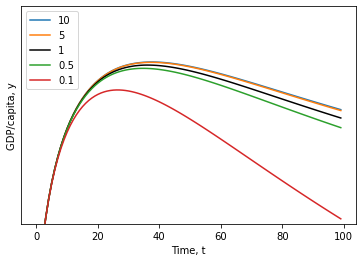

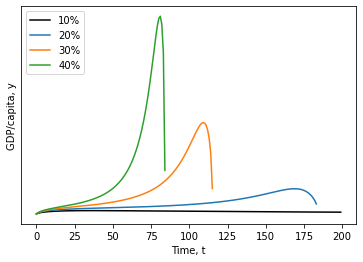

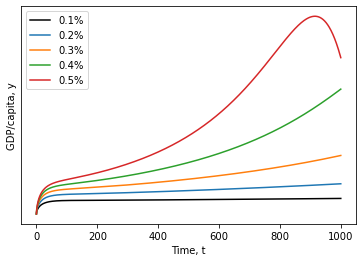

In [6]:
#Note recommend running the entire notebook again if making substantial changes here.
#Set time to 100 'years':
T = 100
#Set up some shared label names to call below.
x_label='Time, t'
y_label='GDP/capita, y'
#(Note confirming or updating parameters and initial values as needed below)
#
#Figure 1a:
i_params['s']=0.1
i_params['S_cap']=10
i_params['a_factor']=1/3
i_params['b_factor']=1/3
i_params['S_factor']=1/3
i_params['L_floor']=5
S_initial=10
model_L_floor_1 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_1.result_gen(T, var = 'y'), color='black', label=S_initial/i_params['L_floor'])
i_params['L_floor']=10
model_L_floor_2 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_2.result_gen(T, var = 'y'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=50
model_L_floor_3 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_3.result_gen(T, var = 'y'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=100
model_L_floor_4 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_4.result_gen(T, var = 'y'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=200
model_L_floor_5 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_5.result_gen(T, var = 'y'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=0.5
plt.yticks([])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.legend(loc='upper left')
plt.savefig('graph1a.jpeg')  
plt.show()
#
#Figure 1b:
i_params['L_floor']=5
model_L_floor_1 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_1.result_gen(T, var = 'S'), color='black', label=S_initial/i_params['L_floor'])
i_params['L_floor']=10
model_L_floor_2 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_2.result_gen(T, var = 'S'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=50
model_L_floor_3 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_3.result_gen(T, var = 'S'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=100
model_L_floor_4 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_4.result_gen(T, var = 'S'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=200
model_L_floor_5 = BGE_model(i_params)
plt.plot(range(0,T),model_L_floor_5.result_gen(T, var = 'S'), label=S_initial/i_params['L_floor'])
i_params['L_floor']=0.5
plt.yticks([])
plt.ylabel('Biosphere or natural capital, S')
plt.xlabel(x_label)
plt.legend(loc='upper left')
plt.savefig('graph1b.jpeg')  
plt.show()
#
#Figure 2a:
i_params['L_floor']=50
i_params['n']=0.00
model_pop_g_L_unst_0 = BGE_model(i_params)
plt.plot(range(0,T),model_pop_g_L_unst_0.result_gen(T, var = 'y'), label='0') #int(i_params['n']*100))
i_params['n']=0.01
model_pop_g_L_unst_1 = BGE_model(i_params)
plt.plot(range(0,T),model_pop_g_L_unst_1.result_gen(T, var = 'y'), label='1%')
i_params['n']=0.02
model_pop_g_L_unst_2 = BGE_model(i_params)
plt.plot(range(0,T),model_pop_g_L_unst_2.result_gen(T, var = 'y'), label='2%')
i_params['n']=0.03
model_pop_g_L_unst_3 = BGE_model(i_params)
plt.plot(range(0,T),model_pop_g_L_unst_3.result_gen(T, var = 'y'), label='3%')
i_params['n']=0.01
plt.yticks([])
#plt.title('GDP/capita trend in non-safe zone by population growth rate')
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.legend(loc='upper left')
plt.savefig('graph2a.jpeg')  
plt.show()
#
#Figure 2b:
T=100
i_params['S_cap']=10
i_params['s']=0.1
i_params['a_factor']=1/3
i_params['b_factor']=1/3
i_params['S_factor']=1/3
i_params['L_floor']=0.5
S_initial=10
i_params['α_z_scalar']=10
model_S_cap_2 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_2.result_gen(T, var = 'y'),label=i_params['α_z_scalar'])
i_params['α_z_scalar']=5
model_S_cap_2 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_2.result_gen(T, var = 'y'),label=i_params['α_z_scalar'])
i_params['α_z_scalar']=1
model_S_cap_1 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_1.result_gen(T, var = 'y'), color='black',label=i_params['α_z_scalar'])
i_params['α_z_scalar']=0.5
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = 'y'), label=i_params['α_z_scalar'])
i_params['α_z_scalar']=0.1
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = 'y'), label=i_params['α_z_scalar'])
i_params['α_z_scalar']=1
plt.yticks([])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.legend(loc='upper left')
plt.ylim([0.2,0.6])
plt.savefig('graph2b.jpeg')  
plt.show()
#
#Figure 3a:
T=200
i_params['S_cap']=10
i_params['s']=0.1
i_params['a_factor']=1/3
i_params['b_factor']=1/3
i_params['S_factor']=1/3
i_params['L_floor']=0.5
S_initial=10
i_params['s']=0.1
model_s_rate_1 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_1.result_gen(T, var = 'y'), color='black',label='10%')
i_params['s']=0.2
model_s_rate_2 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_2.result_gen(T, var = 'y'),label='20%')
i_params['s']=0.3
model_s_rate_3 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_3.result_gen(T, var = 'y'), label='30%')
i_params['s']=0.4
model_s_rate_4 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_4.result_gen(T, var = 'y'), label='40%')
i_params['s']=0.1
plt.yticks([])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.legend(loc='upper left')
plt.savefig('graph3a.jpeg')  
plt.show()
#
#Figure 3b:
T=1000
i_params['s']=0.01
i_params['n']=0
i_params['S_cap']=10
i_params['a_factor']=1/3
i_params['b_factor']=1/3
i_params['S_factor']=1/3
i_params['L_floor']=0.5
S_initial=10
model_s_rate_1 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_1.result_gen(T, var = 'y'), color='black',label='0.1%')
i_params['s']=0.02
model_s_rate_2 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_2.result_gen(T, var = 'y'),label='0.2%')
i_params['s']=0.03
model_s_rate_3 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_3.result_gen(T, var = 'y'), label='0.3%')
i_params['s']=0.04
model_s_rate_4 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_4.result_gen(T, var = 'y'), label='0.4%')
i_params['s']=0.05
model_s_rate_4 = BGE_model(i_params)
plt.plot(range(0,T),model_s_rate_4.result_gen(T, var = 'y'), label='0.5%')
i_params['s']=0.1
plt.yticks([])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.legend(loc='upper left')
plt.savefig('graph3b.jpeg')  
plt.show()
#
#Note a red error message may appear below as a result of global extinction. No worries, carry on.

### Exploration of Some Interventions at t=50:

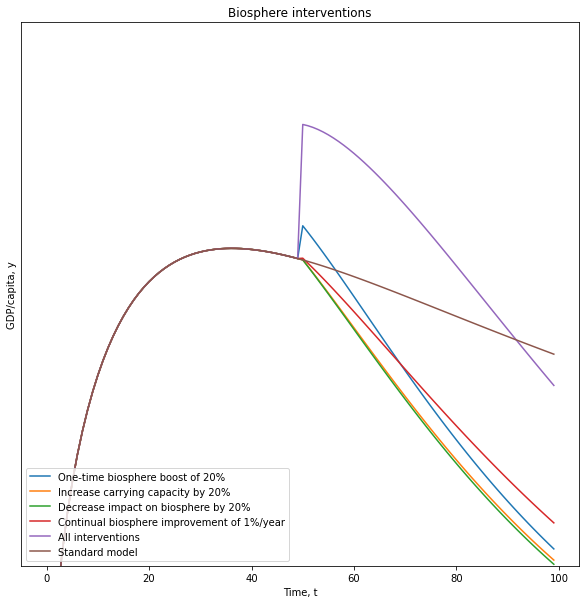

In [7]:
#Confirm some of the parameters:
T=100
y_label= 'GDP/capita, y'
x_label='Time, t'
i_params['S_cap']=10
i_params['s']=0.1
i_params['a_factor']=1/3
i_params['b_factor']=1/3
i_params['S_factor']=1/3
i_params['L_floor']=0.5
variable_of_interest='y'
i_params['n']=0.01
#Set up the plot:
plt.figure(figsize=(10,10))
#Run the alternative interventions:
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = variable_of_interest, alternative=1), 
         label='One-time biosphere boost of 20%')
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = variable_of_interest, alternative=2), 
         label='Increase carrying capacity by 20%')
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = variable_of_interest, alternative=3), 
         label='Decrease impact on biosphere by 20%')
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = variable_of_interest, alternative=4), 
         label='Continual biosphere improvement of 1%/year')
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = variable_of_interest, alternative=5), 
         label='All interventions')
model_S_cap_3 = BGE_model(i_params)
plt.plot(range(0,T),model_S_cap_3.result_gen(T, var = variable_of_interest, alternative=0), 
         label='Standard model')
#Set up the resulting plot:
#plt.xticks([])
plt.yticks([])
plt.title('Biosphere interventions')
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.legend(loc='lower left')
plt.ylim([0.2,0.7])
plt.savefig('biosphere_interventions_Y.png')  
plt.show()

### Finished!